In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
#height = w ,center = μ,width = σ，offset = basevalue
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

def two_gaussians(x, h1, c1, w1, h2, c2, w2, offset):
    return (gaussian(x, h1, c1, w1, offset=0) + gaussian(x, h2, c2, w2, offset=0) + offset)

# calculate err
errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2


In [3]:
a = np.genfromtxt('../../rdf.txt')
data = a[128:187,:]

# set start value
guess2 = [0.38, 1.42, 0.7, 0.62, 1.54,0.7, 0]  

optim2, success = optimize.leastsq(errfunc2, guess2[:], args=(data[:,0], data[:,1]))
optim2

array([-0.64916173,  1.34753928, -0.05880806,  3.92334629,  1.49651908,
        0.0954912 , -0.03983246])

In [4]:
z1 = gaussian(data[:,0],optim2[0],optim2[1],optim2[2],0)
z2 = gaussian(data[:,0],optim2[3],optim2[4],optim2[5],0)

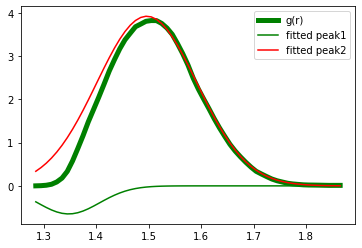

In [7]:
plt.plot(data[:,0], data[:,1], lw=5, c='g', label='g(r)')
#plt.plot(data[:,0], three_gaussians(data[:,1], *optim3),lw=3, c='b', label='fit of 3 Gaussians')
#plt.plot(data[:,0], two_gaussians(data[:,1], *optim2),lw=1, c='r', ls='--', label='fit of 2 Gaussians')
plt.plot(data[:,0],z1,'g-', label='fitted peak1')
plt.plot(data[:,0],z2,'r-', label='fitted peak2')
plt.legend(loc='best')
plt.savefig('result.png')

In [6]:
#err3 = np.sqrt(errfunc3(optim3, data[:,0], data[:,1])).sum()
err2 = np.sqrt(errfunc2(optim2, data[:,0], data[:,1])).sum()

#print('Residual error when fitting 3 Gaussians: {}\n'
#    'Residual error when fitting 2 Gaussians: {}'.format(err3, err2))
print('Residual error when fitting 2 Gaussians: {}'.format(err2))

Residual error when fitting 2 Gaussians: 2.1338433101752754
